# `naturf` Quickstarter

The Neighborhood Adaptive Tissues for Urban Resilience Futures tool (`naturf`) is a Python workflow that generates files readable by the Weather Research and Forecasting (WRF) model. `naturf` uses *geopandas* and *hamilton* to calculate 132 building parameters from shapefiles with building footprint and height information. These parameters can be collected and used in many formats, and the primary output is a binary file configured for input to WRF. This workflow is a flexible adaptation of the National/World Urban Database and Access Portal Tool (NUDAPT/WUDAPT) that can be used with any study area at any spatial resolution. The climate modeling community and urban planners can identify the effects of building/neighborhood morphology on the microclimate using the urban parameters and WRF-readable files produced by `naturf`. The source code for `naturf` can be found on [GitHub](https://github.com/IMMM-SFA/naturf/tree/main), and more information on the urban parameters calculated can be found in the [documentation](https://immm-sfa.github.io/naturf/).

In [1]:
from importlib.resources import files
from naturf import driver

## Case 1

`naturf` requires two inputs: an input dictionary with the location of the shapefile, and a list of the desired outputs. For this first case, we can look at three outputs: `plan_area_fraction`, `area_weighted_mean_of_building_heights`, and `sky_view_factor`.

In [2]:
input_shapefile_path = str(files("naturf.data").joinpath("C-5.shp"))

inputs = {
    "input_shapefile": input_shapefile_path,
}
outputs = ["plan_area_fraction","area_weighted_mean_of_building_heights","sky_view_factor"]
model = driver.Model(inputs, outputs)

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


Render the Directed Acyclic Graph(DAG) to show which functions the model calls in order to create the desired output. Note that the model doesn't execute!

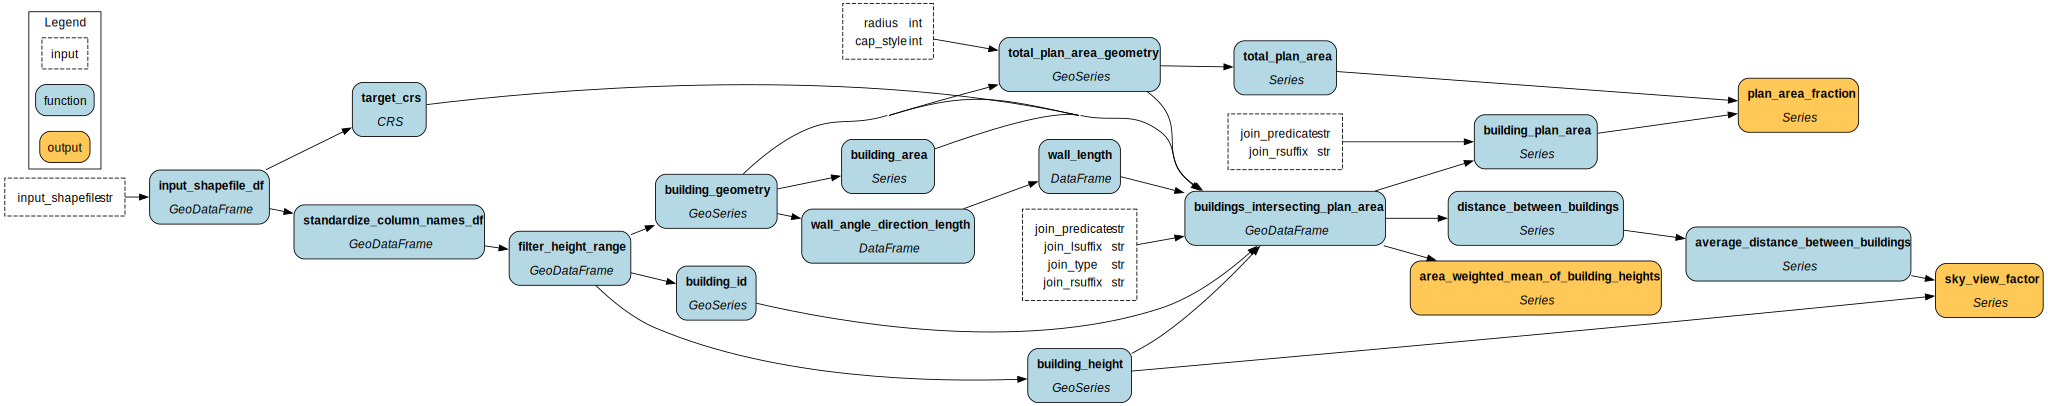

In [3]:
# Note: you will need graphviz to visualize the Directed Acyclic Graph (DAG)
# https://graphviz.org/download/
model.graph()

Execute the model.

In [4]:
df = model.execute()

Naturf DAG -> Execution Complete!                   : 100%|██████████████| 19/19 [00:05<00:00,  3.26funcs/s]


View the first three rows of the output dataframe. Note that `naturf` only outputs the desired columns, as specified above.

In [5]:
df.head(3)

,plan_area_fraction,area_weighted_mean_of_building_heights,sky_view_factor
0,0.009073,2.660000,0.168611
1,0.010528,2.660000,0.168611
2,0.128917,20.193242,0.730937


## Case 2

Now we can run the full model in order to get the required inputs to WRF. WRF requires two files: a binary file with the urban parameter data gridded and written row-by-row into binary and an index file that tells WRF where to put and how to display the data. See the [WRF User Guide](https://homepages.see.leeds.ac.uk/~lecrrb/wrf/aRWUsersGuide.pdf) for more information. The nodes `write_binary` and `write_index` will write the required files to the working directory.

In [6]:
outputs = ["merge_parameters", "write_binary", "write_index"]
model = driver.Model(inputs, outputs)

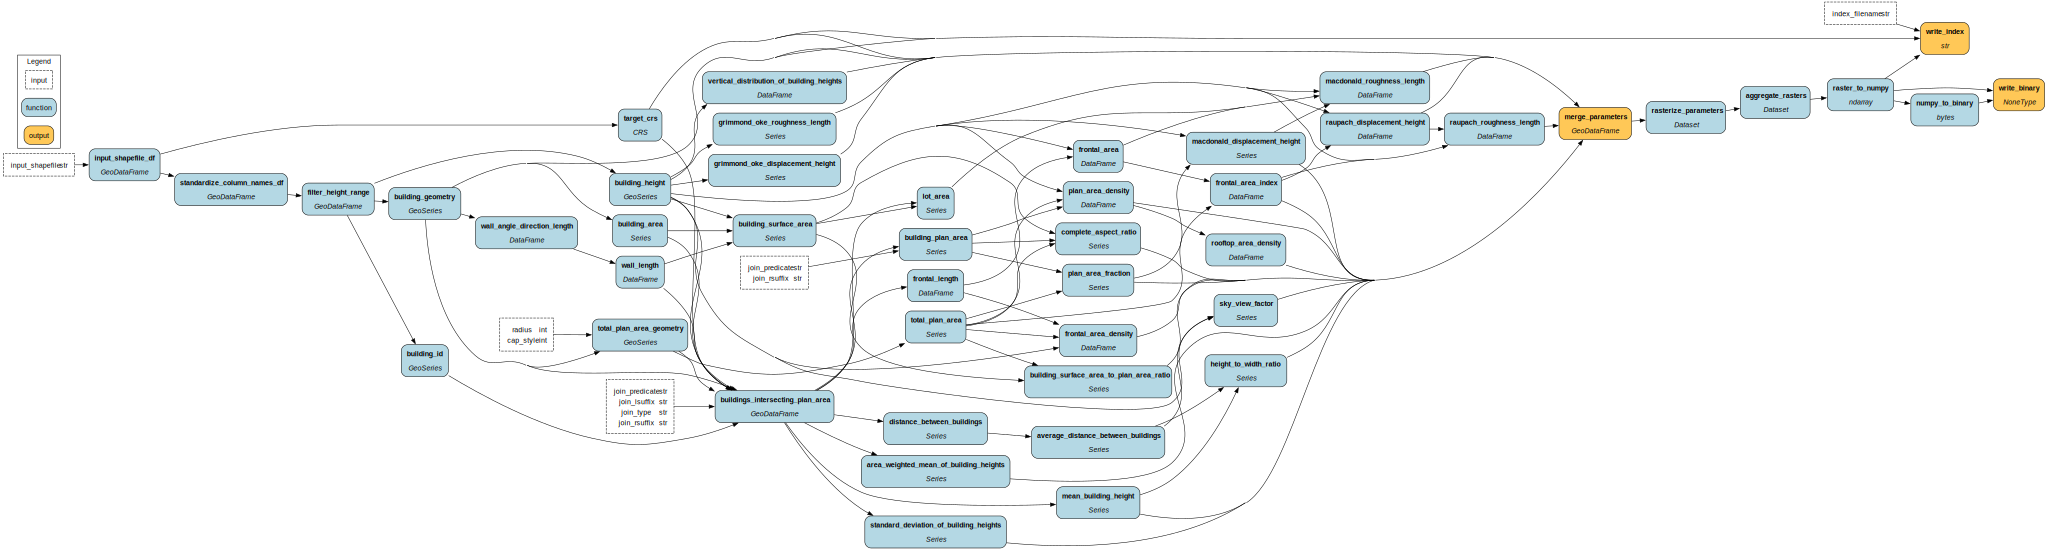

In [7]:
model.graph()

In [8]:
df = model.execute()

Naturf DAG -> Execution Complete!                      : 100%|███████████| 46/46 [00:08<00:00,  5.14funcs/s]


In [9]:
df.head()

,merge_parameters.frontal_area_north_0,merge_parameters.frontal_area_north_1,merge_parameters.frontal_area_north_2,merge_parameters.frontal_area_north_3,merge_parameters.frontal_area_north_4,merge_parameters.frontal_area_north_5,merge_parameters.frontal_area_north_6,merge_parameters.frontal_area_north_7,merge_parameters.frontal_area_north_8,merge_parameters.frontal_area_north_9,...,merge_parameters.vertical_distribution_of_building_heights_9,merge_parameters.vertical_distribution_of_building_heights_10,merge_parameters.vertical_distribution_of_building_heights_11,merge_parameters.vertical_distribution_of_building_heights_12,merge_parameters.vertical_distribution_of_building_heights_13,merge_parameters.vertical_distribution_of_building_heights_14,merge_parameters.building_geometry,merge_parameters.building_count,write_binary,write_index
0,0.001903,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,"POLYGON ((-77.04892 38.87526, -77.04893 38.875...",1,None,None
1,0.002208,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,"POLYGON ((-77.04882 38.87532, -77.04884 38.875...",1,None,None
2,0.019133,0.019133,0.019133,0.019133,0.019133,0.001569,0.0,0.0,0,0,...,0,0,0,0,0,0,"POLYGON ((-77.02035 38.87679, -77.02036 38.876...",1,None,None
3,0.023445,0.023445,0.009331,0.000000,0.000000,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,"POLYGON ((-77.02585 38.87985, -77.02589 38.879...",1,None,None
4,0.036085,0.036085,0.018620,0.000000,0.000000,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,"POLYGON ((-77.02369 38.87912, -77.02309 38.878...",1,None,None


We have 136 columns here, which are the 132 output parameters plus 4 other parameters: `merge_parameters.building_geometry`, `merge_parameters.building_count`, `write_binary`, and `write_index`. 

## Optional: DAGWorks Interactive Dashboard

Since we're using `hamilton` to run `naturf`, users can log each run to DAGWorks (researchers/academics have access to the free tier) by signing up at [dagworks.io](www.dagworks.io) and creating a project. Then either set the environment variables `DAGWORKS_API_KEY`, `DAGWORKS_USERNAME`, and `DAGWORKS_PROJECT_ID` below or set it in the module directly.

Note: The cell below is in the `raw` format, if you want to run it, change the cell type to `python`.